<div class="alert alert-info">
<h1><center><font color=blue> Customer Segmentation 
    by predicting customer behavior<font></center></h1>
</div>

## Initial Data Exploration


### Import libraries

In [53]:
import pandas as pd # for manipulating data
import numpy as np # Linear Algebra operations
import seaborn as sns # for visualizations
import matplotlib.pyplot as plt


In [29]:
df = pd.read_csv('CustomerMarketing-Customer-Value-Analysis.csv')

### Find out number of observatoins and columns


In [30]:
print(df.shape)

(9134, 24)


### Column data types


In [31]:
df.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

### Check for number of unique categories for categorical variables.


In [32]:
# 13 columns
df.value_counts

<bound method DataFrame.value_counts of      Customer       State  Customer Lifetime Value Response  Coverage  \
0     BU79786  Washington              2763.519279       No     Basic   
1     QZ44356     Arizona              6979.535903       No  Extended   
2     AI49188      Nevada             12887.431650       No   Premium   
3     WW63253  California              7645.861827       No     Basic   
4     HB64268  Washington              2813.692575       No     Basic   
...       ...         ...                      ...      ...       ...   
9129  LA72316  California             23405.987980       No     Basic   
9130  PK87824  California              3096.511217      Yes  Extended   
9131  TD14365  California              8163.890428       No  Extended   
9132  UP19263  California              7524.442436       No  Extended   
9133  Y167826  California              2611.836866       No  Extended   

     Education Effective To Date EmploymentStatus Gender  Income  ...  \
0     Bach

### Check for missing values


In [33]:
count = 0
for number in df.isnull().sum(axis = 1):
    if number > 0:
        count = count+1
print('Total number of rows missing a value is',count)

Total number of rows missing a value is 0


### Identify potential features for machine learning


In [34]:
# The features 'Customer','Effective To Date',
# 'EmploymentStatus' are not important at all. 
# Therefore, we drop them from the data frame.

categorical_df = df.select_dtypes(include='object')
df = categorical_df.drop(['Customer','Effective To Date',\
                          'EmploymentStatus'], axis = 1)

### Identify the target column


In [35]:
# Using K means clustering. No target variable. 

In [36]:
df.columns

Index(['State', 'Response', 'Coverage', 'Education', 'Gender', 'Location Code',
       'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

### Look at the distribution of the target columns

/Users/sandeepbansal/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


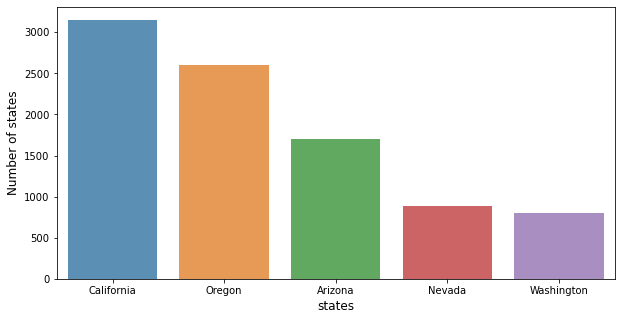

In [37]:
city_count  = df['State'].value_counts()
city_count = city_count[:10,]
plt.figure(figsize=(10,5))
sns.barplot(city_count.index, city_count.values, alpha=0.8)
plt.ylabel('Number of states', fontsize=12)
plt.xlabel('states', fontsize=12)
plt.show()

/Users/sandeepbansal/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


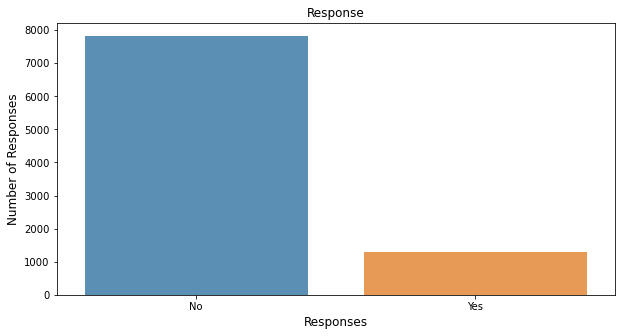

In [38]:
city_count  = df['Response'].value_counts()
city_count = city_count[:10,]
plt.figure(figsize=(10,5))
sns.barplot(city_count.index, city_count.values, alpha=0.8)
plt.title('Response')
plt.ylabel('Number of Responses', fontsize=12)
plt.xlabel('Responses', fontsize=12)
plt.show()

/Users/sandeepbansal/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


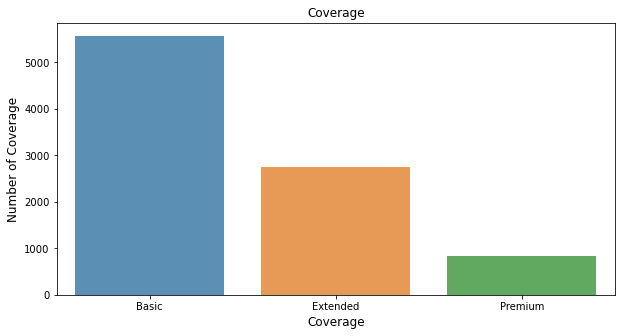

In [39]:
city_count  = df['Coverage'].value_counts()
city_count = city_count[:10,]
plt.figure(figsize=(10,5))
sns.barplot(city_count.index, city_count.values, alpha=0.8)
plt.title('Coverage')
plt.ylabel('Number of Coverage', fontsize=12)
plt.xlabel('Coverage', fontsize=12)
plt.show()



/Users/sandeepbansal/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


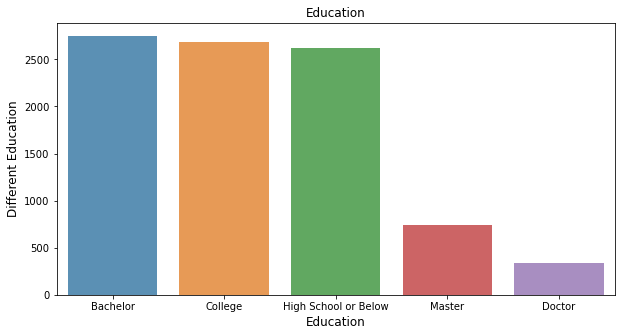

In [40]:
city_count  = df['Education'].value_counts()
city_count = city_count[:10,]
plt.figure(figsize=(10,5))
sns.barplot(city_count.index, city_count.values, alpha=0.8)
plt.title('Education')
plt.ylabel('Different Education', fontsize=12)
plt.xlabel('Education', fontsize=12)
plt.show()



/Users/sandeepbansal/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


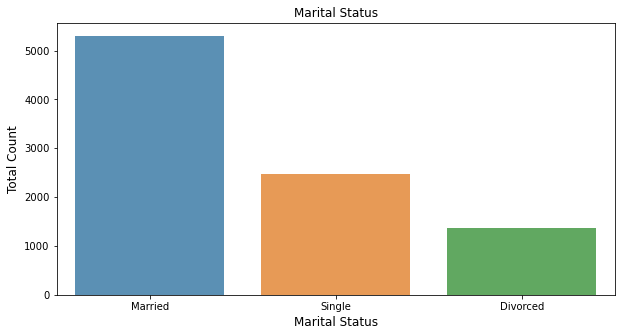

In [41]:
city_count  = df['Marital Status'].value_counts()
city_count = city_count[:10,]
plt.figure(figsize=(10,5))
sns.barplot(city_count.index, city_count.values, alpha=0.8)
plt.title('Marital Status')
plt.ylabel('Total Count', fontsize=12)
plt.xlabel('Marital Status', fontsize=12)
plt.show()


In [57]:
df = pd.read_csv('CustomerMarketing-Customer-Value-Analysis.csv')

df.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [82]:
df = pd.read_csv('CustomerMarketing-Customer-Value-Analysis.csv',usecols = [
    
    
    'Monthly Premium Auto', 'Months Since Last Claim', 'Months Since Policy Inception',
    
    'Number of Open Complaints', 'Number of Policies',
    
])

<AxesSubplot:>

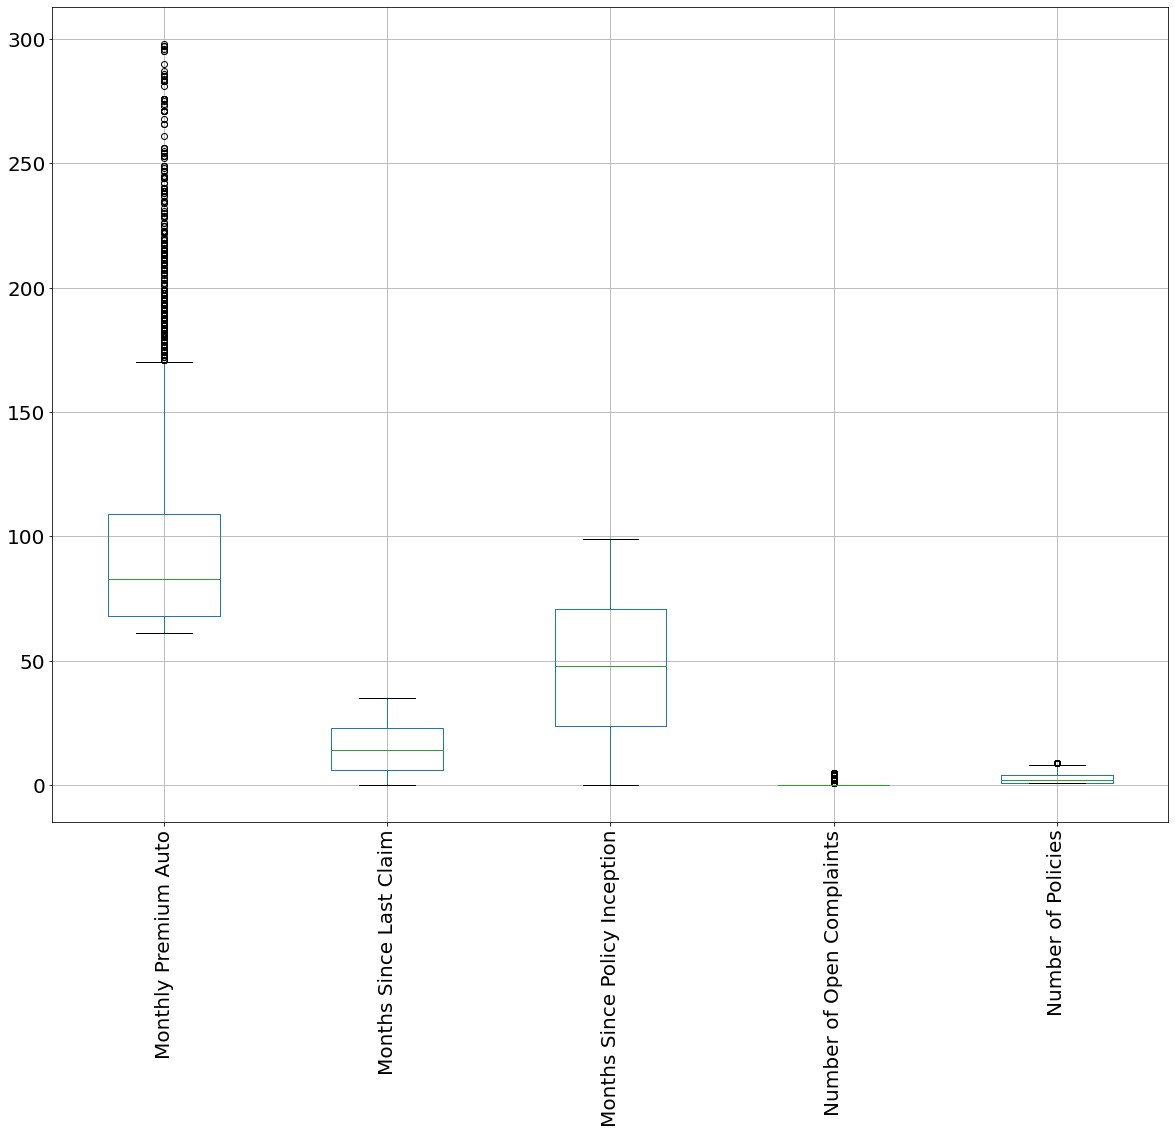

In [88]:

# Syntax of boxplot()

df.boxplot(column=None, by=None, ax=None, fontsize=20, rot=90, grid=True, figsize=(20,15), layout=None, return_type=None, backend=None)


In [90]:
df.describe()

,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,93.219291,15.097000,48.064594,0.384388,2.966170
std,34.407967,10.073257,27.905991,0.910384,2.390182
min,61.000000,0.000000,0.000000,0.000000,1.000000
25%,68.000000,6.000000,24.000000,0.000000,1.000000
50%,83.000000,14.000000,48.000000,0.000000,2.000000
75%,109.000000,23.000000,71.000000,0.000000,4.000000
max,298.000000,35.000000,99.000000,5.000000,9.000000
